# About

* reference:


* Objectives
In this course you'll learn about one of the most important steps on the way to building a great machine learning model: feature engineering. You'll learn how to:

* determine which features are the most important with mutual information
* invent new features in several real-world problem domains
* encode high-cardinality categoricals with a target encoding
* create segmentation features with k-means clustering
* decompose a dataset's variation into features with principal component analysis

# The Goal of Feature Engineering
The goal of feature engineering is simply to *make your data better suited to the problem at hand*.

* Consider "apparent temperature" measures like the heat index and the wind chill. These quantities attempt to measure the *perceived temperature* to humans *based on air temperature, humidity, and wind speed*, things which we can measure directly. 
* You could think of an apparent temperature as the result of a kind of feature engineering, an attempt to make the observed data more relevant to what we actually care about: how it actually feels outside!

You might perform feature engineering to:

* improve a model's predictive performance
* reduce computational or data needs
* improve interpretability of the results

# A Guiding Principle of Feature Engineering
For a feature to be *useful*, it must have a *relationship to the target* that your model is able to learn. Linear models, for instance, are only able to learn linear relationships. So, when using a linear model, your goal is to transform the features to make their relationship to the target linear.

The key idea here is that a *transformation you apply to a feature becomes in essence a part of the model itself*. Say you were trying to predict the Price of square plots of land from the Length of one side. Fitting a linear model directly to Length gives poor results: the relationship is not linear.
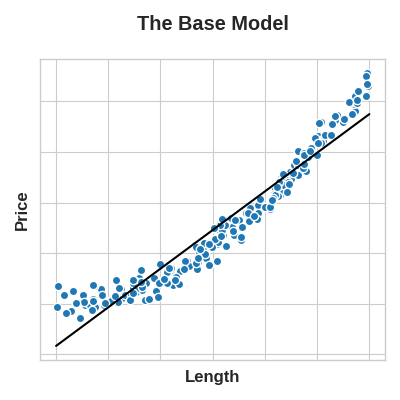
    * linear model fits poorly with length as its only feature


How about if we square the `Length` feature to get `Area`?
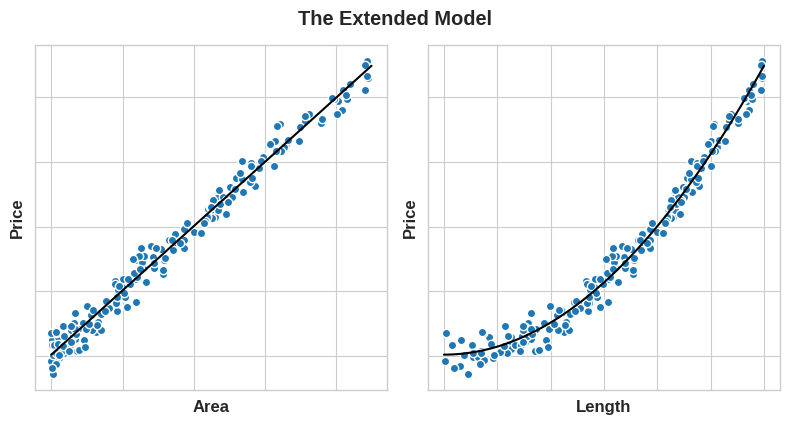
We created a linear relationship!
* Adding Area to the feature set means this linear model can now fit a parabola. 
* Squaring a feature, in other words, gave the linear model the ability to fit squared features.

* This should show you why there can be such a high return on time invested in feature engineering. Whatever relationships your model can't learn, you can provide yourself through transformations. As you develop your feature set, think about what information your model could use to achieve its best performance.



# Example - Concrete Formulations
>To illustrate these ideas we'll see how adding a few synthetic features to a dataset can improve the predictive performance of a random forest model.

The Concrete dataset contains a variety of concrete formulations and the resulting product's compressive strength, which is a measure of how much load that kind of concrete can bear. The task for this dataset is to predict a concrete's compressive strength given its formulation.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

df = pd.read_csv("Data/concrete.csv")
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


You can see here the various ingredients going into each variety of concrete. We'll see in a moment how adding some additional synthetic features derived from these can help a model to learn important relationships among them.

* We'll first establish a baseline by training the model on the un-augmented dataset. This will help us determine whether our new features are actually useful.

* Establishing baselines like this is good practice at the start of the feature engineering process. A baseline score can help you decide whether your new features are worth keeping, or whether you should discard them and possibly try something else.

In [2]:
X = df.copy()
y = X.pop("CompressiveStrength")

# Train and score baseline model
baseline = RandomForestRegressor(criterion="mae", random_state=0)
baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="neg_mean_absolute_error"
)
baseline_score = -1 * baseline_score.mean()

print(f"MAE Baseline Score: {baseline_score:.4}")

/Users/piramolkrishnan/opt/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/piramolkrishnan/opt/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/piramolkrishnan/opt/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/piramolkrishnan/opt/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  wa

MAE Baseline Score: 8.232


If you ever cook at home, you might know that the ratio of ingredients in a recipe is usually a better predictor of how the recipe turns out than their absolute amounts. We might reason then that ratios of the features above would be a good predictor of CompressiveStrength.

The cell below adds three new ratio features to the dataset.

In [3]:
X = df.copy()
y = X.pop("CompressiveStrength")

# Create synthetic features
X["FCRatio"] = X["FineAggregate"] / X["CoarseAggregate"]
X["AggCmtRatio"] = (X["CoarseAggregate"] + X["FineAggregate"]) / X["Cement"]
X["WtrCmtRatio"] = X["Water"] / X["Cement"]

# Train and score model on dataset with additional ratio features
model = RandomForestRegressor(criterion="mae", random_state=0)
score = cross_val_score(
    model, X, y, cv=5, scoring="neg_mean_absolute_error"
)
score = -1 * score.mean()

print(f"MAE Score with Ratio Features: {score:.4}")

/Users/piramolkrishnan/opt/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/piramolkrishnan/opt/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/piramolkrishnan/opt/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/piramolkrishnan/opt/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:395: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  wa

MAE Score with Ratio Features: 7.948


And sure enough, performance improved! This is evidence that these new ratio features exposed important information to the model that it wasn't detecting before.